In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, classification_report
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [2]:
train = pd.read_csv("train.csv")

# Understanding datasets

In [3]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
train.shape

(614, 13)

In [5]:
train.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [7]:
train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

# Filling categorical null values 

In [8]:
def fill_categorical_null_values(df, variable):
    df[variable] = df[variable].fillna(df[variable].mode()[0])
    return df[variable]

In [9]:
train["Gender"] = fill_categorical_null_values(train, "Gender")
train["Married"] = fill_categorical_null_values(train, "Married")
train["Dependents"] = fill_categorical_null_values(train, "Dependents")
train["Self_Employed"] = fill_categorical_null_values(train, "Self_Employed")

# Filling Numerical null values

In [10]:
def fill_numerical_null_values(df, variable):
    df[variable] = df[variable].fillna(df[variable].median())
    return df[variable]

In [11]:
train["LoanAmount"] = fill_numerical_null_values(train, "LoanAmount")
train["Loan_Amount_Term"] = fill_numerical_null_values(train, "Loan_Amount_Term")
train["Credit_History"] = fill_numerical_null_values(train, "Credit_History")

# Datasets visualization

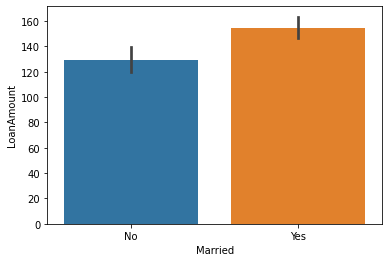

In [12]:
sns.barplot(x = "Married", y = "LoanAmount", data = train)
plt.show()

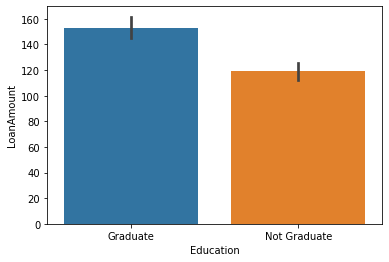

In [13]:
sns.barplot(x = "Education", y = "LoanAmount", data = train)
plt.show()

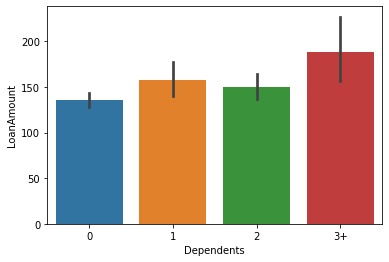

In [14]:
sns.barplot(x = "Dependents", y = "LoanAmount",data = train)
plt.show()

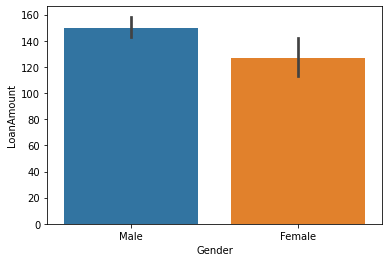

In [15]:
sns.barplot(x = "Gender", y = "LoanAmount", data = train)
plt.show()

<AxesSubplot:xlabel='Loan_Status', ylabel='count'>

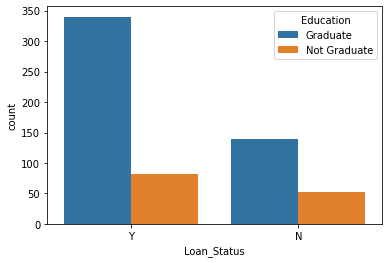

In [16]:
sns.countplot("Loan_Status", hue = "Education", data = train)

<AxesSubplot:>

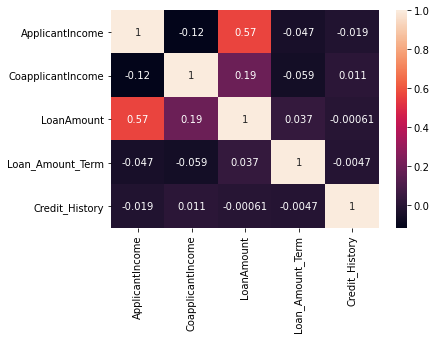

In [17]:
sns.heatmap(train.corr(), annot = True)

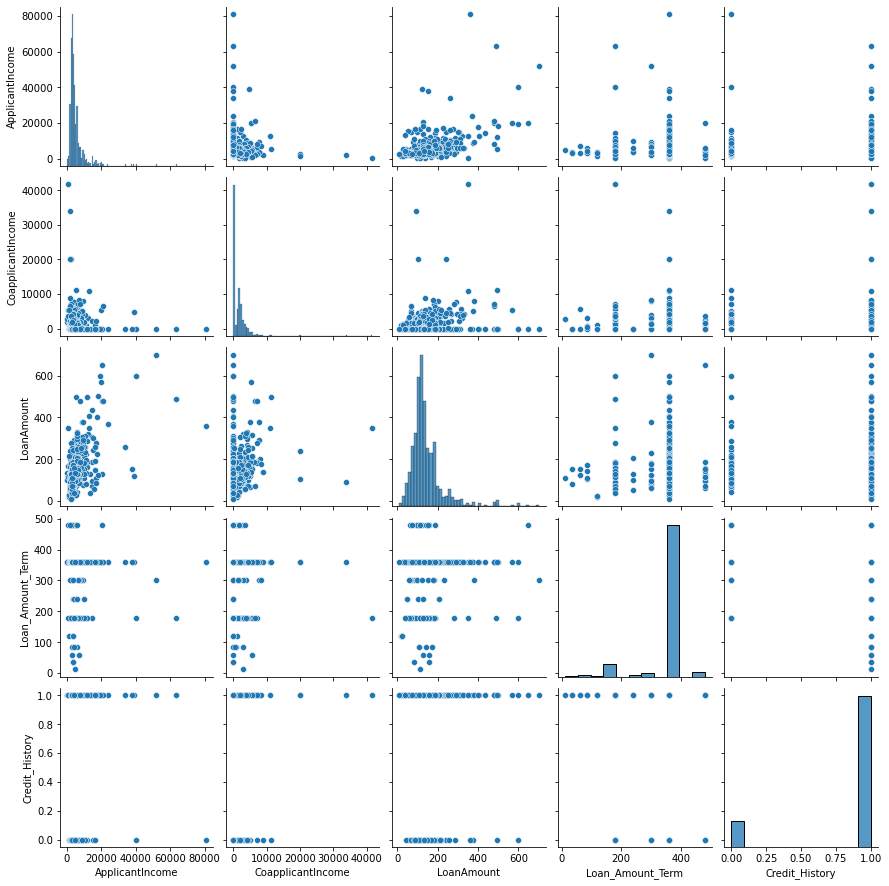

In [18]:
sns.pairplot(data = train)

In [19]:
train.drop(columns = ["Loan_ID", "Loan_Status"], inplace = True)

# Converting Categorical variable to numerical

In [20]:
train = pd.get_dummies(train, drop_first = True)

In [21]:
train2 = train.copy()

# Outlier detection

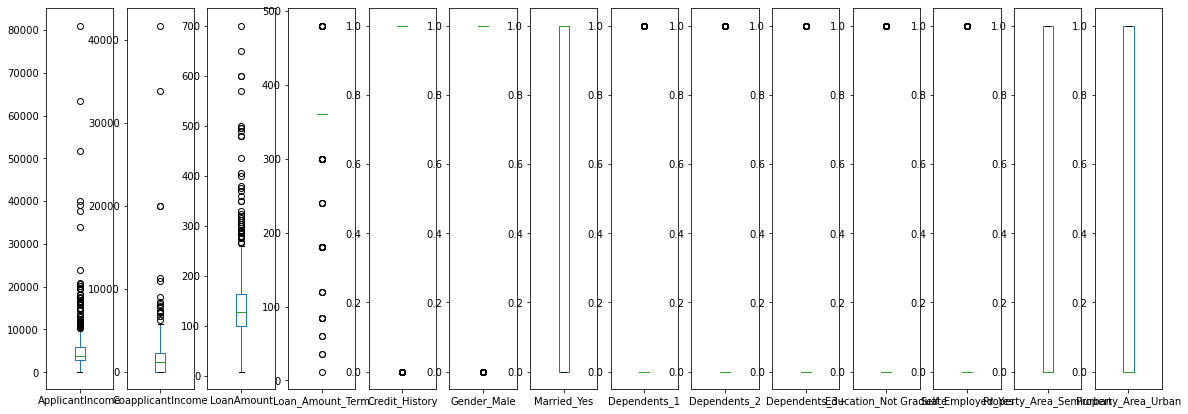

In [22]:
train2.plot(kind = "box",subplots = True, sharex = False, sharey = False, figsize = (20,7))
plt.show()

In [23]:
def outlier_caping(df, variable):
    Q1 = df[variable].quantile(0.25)
    Q3 = df[variable].quantile(0.75)
    IQR = Q3 - Q1
    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR
    return lower_limit, upper_limit

In [24]:
lower_limit, upper_limit = outlier_caping(train2, "ApplicantIncome")

In [25]:
train2['ApplicantIncome'] = np.where(train2['ApplicantIncome'] > upper_limit, int(upper_limit), train2['ApplicantIncome'])
train2['ApplicantIncome'] = np.where(train2['ApplicantIncome'] < lower_limit, int(lower_limit), train2['ApplicantIncome'])

In [26]:
lower_limit, upper_limit = outlier_caping(train2, "CoapplicantIncome")
train2['CoapplicantIncome'] = np.where(train2['CoapplicantIncome'] > upper_limit, int(upper_limit), train2['CoapplicantIncome'])
train2['CoapplicantIncome'] = np.where(train2['CoapplicantIncome'] < lower_limit, int(lower_limit), train2['CoapplicantIncome'])

In [27]:
train_final = train2.copy()

# Datasets splitting

In [28]:
X, y  = train_final.drop(columns =  ["LoanAmount"], axis = 1), train["LoanAmount"]

In [29]:
from sklearn.model_selection import train_test_split

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

# Hyperparameter For RandomForest

In [31]:
n_estimators = [int(x) for x in np.linspace(100, 400, 4)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(5, 20, 4)]
min_samples_split = [2, 5, 10, 15, 100]
min_samples_leaf = [1, 2, 5, 10]
random_grid = {
    'n_estimators' : n_estimators,
    'max_features' : max_features,
    'max_depth' : max_depth,
    'min_samples_split' : min_samples_split,
    'min_samples_leaf' : min_samples_leaf
}

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
LR = RandomForestRegressor()
clf = GridSearchCV(LR, random_grid)
clf.fit(X, y)
clf.best_params_

# Random Forest Regressor

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
regressor = RandomForestRegressor(n_estimators = 300)
model = regressor.fit(X_train, y_train)
pred = model.predict(X_test)
pred[:10]

In [ ]:
sns.distplot(pred - y_test)

In [ ]:
sns.scatterplot(pred, y_test)